<a href="https://colab.research.google.com/github/Vineesh1998/Mini-Project/blob/main/Bird_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow-gpu

In [ ]:
!nvidia-smi

Fri Feb  4 04:34:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
zip = ZipFile('/content/drive/MyDrive/Data_set/birdsss.zip', 'r')
zip.extractall()

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
train_directory='/content/Birds/train'
test_directory='/content/Birds/test'
val_directory='/content/Birds/valid'

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
  # useful for getting number of classes
folders = glob('/content/Birds/train/*')
len(folders)

16

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2411 images belonging to 16 classes.
Found 80 images belonging to 16 classes.


In [ ]:
print(len(training_set))
print(len(test_set))

76
3


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
76/76 [==============================] - 64s 603ms/step - loss: 1.2848 - accuracy: 0.6358 - val_loss: 0.2564 - val_accuracy: 0.9000
Epoch 2/10
76/76 [==============================] - 37s 478ms/step - loss: 0.3007 - accuracy: 0.9195 - val_loss: 0.1447 - val_accuracy: 0.9625
Epoch 3/10
76/76 [==============================] - 36s 476ms/step - loss: 0.1889 - accuracy: 0.9473 - val_loss: 0.1453 - val_accuracy: 0.9625
Epoch 4/10
76/76 [==============================] - 36s 476ms/step - loss: 0.1261 - accuracy: 0.9676 - val_loss: 0.0737 - val_accuracy: 0.9875
Epoch 5/10
76/76 [==============================] - 36s 473ms/step - loss: 0.0665 - accuracy: 0.9855 - val_loss: 0.0485 - val_accuracy: 1.0000
Epoch 6/10
76/76 [==============================] - 36s 473ms/step - loss: 0.0541 - accuracy: 0.9888 - val_loss: 0.0608 - val_accuracy: 0.9875
Epoch 7/10
76/76 [==============================] - 36s 475ms/step - loss: 0.0415 - accuracy: 0.9938 - val_loss: 0.0795 - val_accuracy: 0.9625

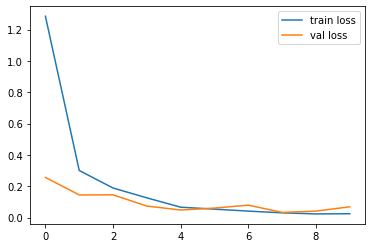

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

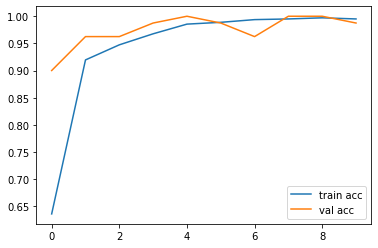

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [ ]:
model.save('BC.h5')

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

model1 = load_model('./BC.h5',compile=False)  

In [ ]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}


In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

'AMERICAN PIPIT'

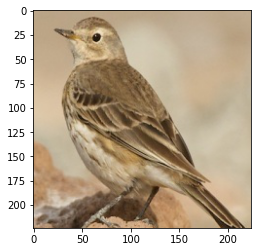

In [ ]:
img='/content/Birds/test/AMERICAN PIPIT/1.jpg'
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)

In [ ]:
import tensorflow as tf
import keras as k
print(tf.__version__)
print(k.__version__)

2.7.0
2.7.0
